
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Learning Objectives 

At the end of the experiment, you will be able to:

1.   Generate text which is similar to the writing style of William Shakespeare
2.   Understand how to adapt or tune the trained network

In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/week_12/module_3_week_12_experiment_1.mp4" type="video/mp4">
</video>
""")

## Dataset


###  Description

The dataset used in this experiment has partial content of different plays of Shakespeare concatenated into a single plain text file. 

Shakespeare is a famous English poet , play writer and actor. He is regarded as the greatest writer in the English language and the world's greatest dramatist. He is often called a England's national poet and the Bard of Avon. 

We have chosen plays of Shakespeare as our dataset mainly for two reasons : 

1. His work is widely recognized as standard for poetry and language.
2. The result of combining of his work provides a sizeable corpus for our model to learn.

The plays of Shakespeare are taken from the following url:

https://www.opensourceshakespeare.org/views/plays/plays.php


## Domain Information

Music and Art are considered creative in nature and creating them is assumed to be more difficult when compared to writing a book, article or text. But the reality is that creating music and art is less complicated because there are no strict rules like which direction should one paint in or when to pause between the notes. However,  while writing a text one must follow grammatical rules. Hence, writing/generating text task is more related to machine learning and artifical intellegence.





## AI/ML Technique 



We are going to use RNN algorithm to generate text which is similar to the writing style of Shakespeare. Let us try to understand the main idea behind using this algorithm.

### RNN algorithm

The main idea is to use sequential information. In a traditional neural network we assume that all inputs (and outputs) are independent of each other. But for many tasks that’s a bad idea. If you want to predict the next word in a sentence you better know which words came before it. This is possible through RNN. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations. 

*Example:*  We take an example string **“HELLO”**. The vocabulary of the example is made of four letters or characters H,E,L,O. Now, let us apply RNN algorithm on this.

We give *'H'* as input to the trained RNN model, it would give us an output *'E'*. In the next stage, this output *'E'* is passed as the new input which would give us the new output *'L'*. As the cycle follows, this output *'L'* is the new input but then what do you think the new output should be, second *‘L’* or *‘O’*? This is the challenge in predicting the next letter or character which RNN can solve. RNN has its own memory which helps it to predict based on the previous characters in this case H, E and L. Hence the output would most probably be *'L'* and not *'O'*.  

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/7.1.png)

In this experiment we will follow below steps:

1.   Preparing the data
2.   Building the model
3.   Defining helper functions
4.   Training the model
5.    Adapting or Fine-tuning for text generation




## Keywords 



* RNN
* Gated Recurrent Unit
* Crossentropy
* Adam

## Expected time to complete the experiment is : 90 mins

## Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M3W1E36_RNN" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install unidecode")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week10/Exp1/shakespeare.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### 1. Preparing the Data

The file we are using is a plain text file. We turn any potential unicode characters into plain ASCII by using the unidecode package.



Let us start by importing all the required packages to perform this experiment:

In [0]:
## Importing required packages
import unidecode
import string
import random
import re
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
all_characters = string.printable
## code to find length of all_characters and storing the value in n_characters
n_characters = len(all_characters)
## code to convert unicode characters into plain ASCII.
file = unidecode.unidecode(open('shakespeare.txt').read())
## code to find length of the file
file_len = len(file)
## printing the length of the file
print('file_len =', file_len)

file_len = 1115393


The variable 'file' is a string with 1115393 characters. This is the raw content of the Shakespeare text file (dataset file), including many details like white spaces, line breaks etc. 

Now to get the sense of the data we print first 1000 characters in the string:

In [0]:
file[:1000]

"First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you know Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us kill him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be done: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citizens, the patricians good.\nWhat authority surfeits on would relieve us: if they\nwould yield us but the superfluity, while it were\nwholesome, we might guess they relieved us humanely;\nbut they think we are too dear: the leanness that\nafflicts us, the object of our misery, is as an\ninventory to particularise their abundance; our\nsufferance is a gain to them Let us revenge this with\nour pikes, ere we become rakes: for the gods know I\nspeak this in hunger 

As the string is large, we will split it into chunks to provide inputs to the RNN using the function random_chunk()

In [0]:
## Initializing the length of chunk
chunk_len = 200
## Function to split the string into chunks
def random_chunk():
    ## Initializing the starting index value of the big string 
    start_index = random.randint(0, file_len - chunk_len)
    ## Initializing the ending index of the string 
    end_index = start_index + chunk_len + 1
    ## returning the chunk
    return file[start_index:end_index]

print((random_chunk()))

riar hath been with him, and
advised him for the entertainment of death.

ESCALUS:
Good even, good father.

DUKE VINCENTIO:
Bliss and goodness on you!

ESCALUS:
Of whence are you?

DUKE VINCENTIO:
Not 


###  2. Building the Model

This model will take input as the character for step $t_{-1}$, and is expected to give the output $t$, which is the next character. There are three layers:
1. Linear layer that encodes the input character into an internal state
2. GRU layer (which may itself have multiple layers) that operates on that internal and hidden state 
3. Decoder layer that outputs the probability distribution



In [0]:
### Creating recurrent neural network
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

### 3. Defining the Helper Functions

Let us define some helper functions to:

1. Convert the input string chunks into the character tensors
2. Evaluate the model

#### Inputs and Targets

Each chunk will be turned into a tensor, specifically a LongTensor (used for integer values), by looping through the characters of the string and looking up the index of each character in all_characters.

In [0]:
# Turn string into list of longs
def char_tensor(string):
    ##  tensor is a array
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


Finally we assemble a pair of input and target tensors for training, from a random chunk. The input will be all characters up to the end, and the target will be all characters from the first. So if our chunk is "abc" the input will correspond to "ab" while the target is "bc".

In [0]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

#### Evaluating

To evaluate the network we will feed one character at a time, use the outputs of the network as a probability distribution for the next character, and repeat. To start generation we pass a priming string to start building up the hidden state, from which we then generate one character at a time.



In [0]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
     
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        #this part is applying the softMax
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

### 4. Training the Model

To keep track of how long training takes, we have added a time_since(timestamp) function which returns a human readable string:

In [0]:
## Importing required packages
import time, math
## function to print amount of time passed
def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

#### The main training function

In [0]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        '''unsqueeze() is used to add dimension to the tensor'''
        loss += criterion(output, target[c].unsqueeze(dim=0))
    # Back propagation
    loss.backward()
    decoder_optimizer.step()

    return loss.item() / chunk_len

Then we define the training parameters, instantiate the model, and start training. In the below cell we are trying to print the chunk, loss and time taken for every 50th iteration and for every 20th iteration we are trying to plot the loss vs epochs(iterations).

In [0]:
n_epochs = 2000 #Number of epochs
print_every = 50
plot_every = 20
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
## Optimizer
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
## Loss function
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 6s (50 2%) 2.4768]
Whath cor, hay ber whime
We, fo hate fou ther mefene nos deite, asth manes, arth pith.

lof sove,
IN m 

 12s (100 5%) 2.0745]
Whiunwst hear lours the, an thet wh the an op wthre sear the rais no shetoud nou how;
Harn sto 'ers, o 

 18s (150 7%) 2.2653]
Whe noner care gepveesp.

VLLULA:
And your in his of to you harce hor;
Fo yous in than have woods lome 

 24s (200 10%) 2.2264]
Whave shougher the him, I and me the gowend a pherenst am that mare mank ding be me deender to sewre,  

 29s (250 12%) 1.9536]
Whiont helk morows tthy mears, hare andy ad his is sing died in thot irs
What in weit here thai shou r 

 36s (300 15%) 1.9565]
Whice.

MENG
HARD LUORD DARDWICH:
What and reloneds; so cout? hat sthe hasced movere father my preveed 

 42s (350 17%) 1.9921]
Whou ware is coulings
Hars therker,
And pledss and the therger of the fort it callail sicing of lies,  

 47s (400 20%) 1.9054]
Who grounde my of hivile to you sipour fror the othe sienly; see't him for cogontie, s

#### Plotting the Training Losses

Plotting the historical loss from all_losses shows the network learning:

Text(0, 0.5, 'loss')

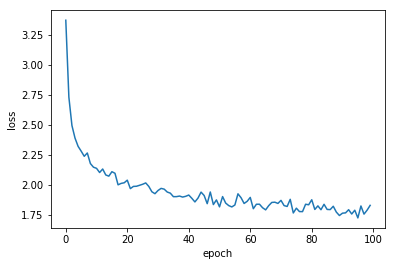

In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)
plt.xlabel("epoch")
plt.ylabel("loss")

### 5. Adapting or Tuning for Text Generation

In the evaluate function above, every time a prediction is made, the outputs are divided by the "temperature" argument passed. Using a higher number makes all actions more equally likely, and thus gives us "more random" outputs. Using a lower value (less than 1) makes high probabilities contribute more. As we turn the temperature towards zero we are choosing only the most likely outputs.


We can see the effects of this by adjusting the temperature argument:

In [0]:
print(evaluate('u', 200, temperature=0.8))

ughts the kindnes foll.

First I harst send, Go thou father?

PETRUCHOM:
Why, you warderer, a ase preath reach so croese?
And thou maty purd. I wak brother.

ESCARD II:
Welf my speak at the pity,
To li


Lower temperatures are less varied, choosing only the more probable outputs:

In [0]:
print(evaluate('Th', 200, temperature=0.2))

The have the heart a may the son the man the for the preather and me of the proper,
The be the present the son the father here a preath and son the son the preath and the prest the preath the proves the



Higher temperatures more varied, choosing less probable outputs:

In [0]:
print(evaluate('how', 200, temperature=1.4))

hown eqaws? RAMKCEL: ove
old thue Pueful motitdry, hid
if, tum of Ro RIWaG:
So thy fotery detrome.
Fuacfet;
Aottyrem earbsir'd's be isplea us.

CAPTIS:
Nauce priciiany threse'fth floos let'seg it undain!


### Ungraded Exercise 1:

Change the number of epochs to 1000. Calculate the time taken and loss:

In [0]:
### Your code Here
n_epochs = 1000 #Number of epochs
print_every = 50
plot_every = 20
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
## Optimizer
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
## Loss function
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
loss = 0
for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

#     if epoch % print_every == 0:
#         print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
#         print(evaluate('Wh', 100), '\n')

#     if epoch % plot_every == 0:
#         all_losses.append(loss_avg / plot_every)
#         loss_avg = 0
print("time taken = ",time_since(start), " loss=", loss )


time taken =  1m 59s  loss= 1.7981071472167969


### Ungraded Exercise 2:

Change the print every to 50 and plot every to 20. Calculate the time taken and loss and plot the loss graph:

time taken =  2m 1s  loss= 1.827499542236328


Text(0, 0.5, 'loss')

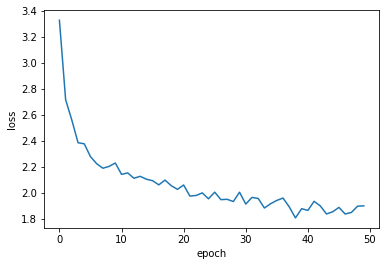

In [0]:
### Your code Here
### Your code Here
n_epochs = 1000 #Number of epochs
print_every = 50
plot_every = 20
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
## Optimizer
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
## Loss function
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
loss = 0
for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

#     if epoch % print_every == 0:
#         print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
#         print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0
print("time taken = ",time_since(start), " loss=", loss )

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)
plt.xlabel("epoch")
plt.ylabel("loss")

### Acknowledgement

https://blog.owulveryck.info/2017/10/29/about-recurrent-neural-network-shakespeare-and-go.html

### Please answer the questions below to complete the experiment:




In [0]:
#@title As we turn the temperature towards zero we are choosing only the most likely outputs? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["True","False"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = " test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5282
Date of submission:  23 May 2019
Time of submission:  23:48:34
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
